# Data Scientist Nanodegree   
## Supervised Learning
## Project: Finding Donors for *CharityML*
<br> PROJECT 1 HENRY HARFOUCHE

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# How are income variables represented:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

There are 2 unique strings which indicate the income groups: '<=50k' and '>50K'

In [4]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.query('income == ">50K"').shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.query('income == "<=50K"').shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100,2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### The following is rough work to get a quick feel for the data

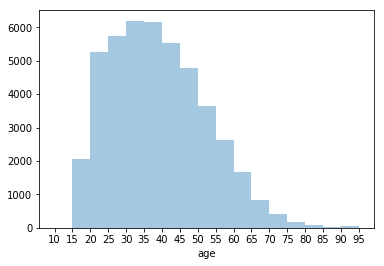

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

bins = np.arange(10,100,5)

sb.distplot(data.age, bins=bins, kde=False)
locs, labels= plt.xticks()
plt.xticks(bins);

In [6]:
data.workclass.value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [7]:
data.education_level.value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

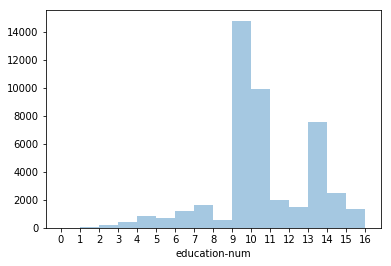

In [8]:
data['education-num'].value_counts()

bins = np.arange(0,data['education-num'].max()+1,1)

sb.distplot(data['education-num'], bins=bins, kde=False)
locs, labels= plt.xticks()
plt.xticks(bins);

In [9]:
data['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [10]:
data.occupation.value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [11]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
data.relationship.value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [13]:
data.race.value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [14]:
data.sex.value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

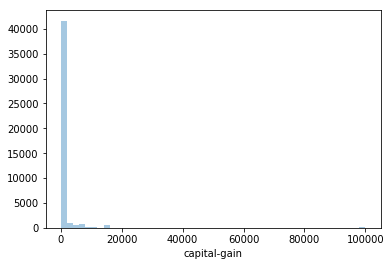

In [15]:
sb.distplot(data['capital-gain'], kde=False);
#set y limits

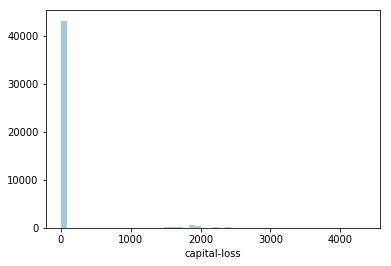

In [16]:
sb.distplot(data['capital-loss'], kde=False);

In [17]:
data['hours-per-week'].min(),data['hours-per-week'].max(),

(1.0, 99.0)

In [18]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


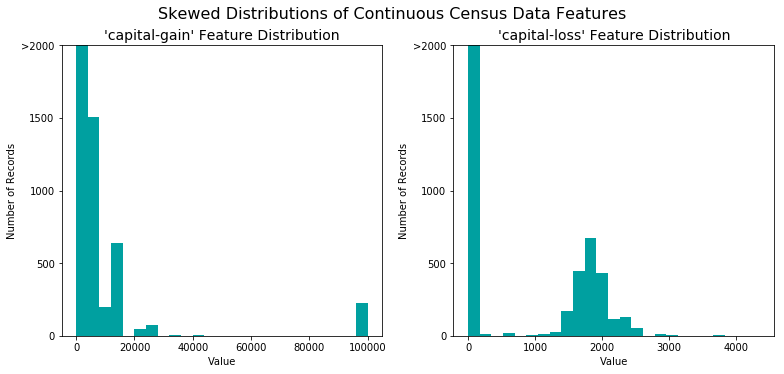

In [19]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


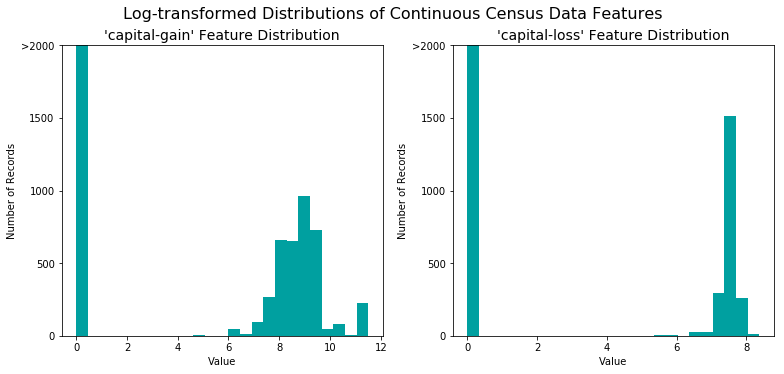

In [20]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [21]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [22]:
features_log_minmax_transform.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [23]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)
income = income['>50K']

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [25]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta **2) * precision*recall / ((beta**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(income,np.ones(len(income)))

0.24784396974923709

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

A)Describe one real-world application in industry where the model can be applied. 
<br>B)What are the strengths of the model; when does it perform well?
<br>C)What are the weaknesses of the model; when does it perform poorly?
<br>D)What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

The models appropriate for this type are problem have to be classification models as opposed to regression models. I have chosen to use a simple Decision Tree, a bagging classifier and a Random Forest.

__Decision trees__ 

A) Decision trees are used in banks to help determine customer's credit worthiness. They are used here because of their interpretability... with decision trees it is very easy to understand and explain decisions. Model interpretability is very important because the modeler needs to understand his inputs/outputs and if they make any sense, the credit applicant needs to understand if he is being being treated fairly and regulators want to ensure the process process is transparent and fair. 
<br><br>B) The strenght of the Decision Tree model is it's simplicity and its interprebility. The model can easily explain the expected outcome given multiple different scenarios. In addition, the model is pretty straightforward as it does not require much data preparation and the algorithm is simple and easy to understand. At every branch of the tree, the model calculates the next most important factor and picks accordingly.  
<br>C) Disadvantages: decision trees can sometimes overcomplicate the decision making process and overfit the data. In addition, it is subject to variance since it uses a 'greedy' problem solving approach. It looks and splits the tree based on the factor which will immediately limit accuracy loss. This approach can lead to lower accuracy rates.
<br><br>D) Decision trees are a good candidate for this problem because we are looking at a large number of qualitative features and we want to know which ones are the most important in determining whether or not an individual's income is above or below 50,000. In addition, when we have a new potential donor, they will have a large and distinct combination of these features so we can use a decision tree to help us make and understand the assesment.

<br> __Bagging classifier__
<br><br> I've decided to user a Bagging Classifier because it helps reduce variance. There is usually 3 sources of error in predictive modelling: variance, bias and noise. Decision trees' accuracy suffers from variance because depending on how we split the data (and subsequently create the tree based on that split), we can easily come up with different decision trees. If the training split obtained is significantly different then the previous split, then we will obtain different trees. Thus, the decision tree's predictive ability is subject to variance which can  lead to different Binary outputs.
<br> Bagging stands for BootStrap Aggregating. What happens is that it boostraps (resamples the training data multiple times) and aggregates the results. By doing so, the model's variance is greatly reduced because we're re-sampling the training data so the effect of a randomly high or low sampled occurence for a certain trait is greatly diminished. In my case, I will be conducting multiple decision trees and aggregating the results to improve our model's accuracy.   
<br><br>A) Bagging Ensemble methods are 'black box' methods and for this reason, if there is a strict regulatory oversight on the decision making process then Bagging Ensemble methods are not used. Nonetheless, these methods can be used  in a company internally when deciding on a marketting campaign for example. With a marketing campaign, different types of strategies can be used and compared and we can use the model to predict the effectiveness of the strategy on past data which can help drive our decision for the next campaign.
<br><br>B) Bagging Ensemble methods strenghts lie in the fact that it reduces variance and thus can improve the accuracy of the prediction in the model. For this reason, it helps protect us against overfitting because of the boostrapping that is done.
<br><br>C) Bagging has a few disadvantages. Mainly, it is more computationally expensive and we lose interpretability because we are running the model many times and aggregating/averaging the results. For this reason, since we are not building a final tree, we give up and trade off the interpretation of the results and the interpretation that a decision tree would offer.  
<br>D) Bagging is a good model candidate because it generally improves accuracy when used in comparison to a decision tree. In our case, improving accuracy, even by a small marging means we can improve the success ratio when we send our prospective donors messages. If we identify individuals who make more then 50K with greater precision, we risk sending less messages or calling fewer individuals who don't fit this criteria which is good for the public image/reputation and operating costs of our charity. 

<br><br>__Random Forests__:
<br><br>A) Random Forests is another 'black box' model which makes it a bad candidate if there is a large oversight on the decision making process, or if an end user wants to know why a decision was chosen for or against him. Random Forests are used in the industry when the decision making process can be hidden. For example, for email spam classifications or spam classification on social networks. 
<br><br>B) Advantages: Random forests are more accurate then decision trees. Random forests were built in mind to reduce  variance and bias. Like bagging classifiers, random forests use a process of averaging out the results which helps against overfitting.   
<br>C) Disadvantage: The biggest drawback of random forest is their loss of interpretability. This is quite significant because as previously mentionned, interpretability is becoming one of the most important topics in Big Data, AI and machine learning.
<br><br>D) In our specific case, Random Forrests is a good candidate because of its improved accuracy. In addition, we are not really concerned as to why the model choses person A over person B but rather, we want to predict the 50K income bracket so the reasoning behind whether or not a new person fits in is not so important to us. 

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [27]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    #learner = None
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 1)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.



BaggingClassifier trained on 362 samples.
BaggingClassifier trained on 3618 samples.
BaggingClassifier trained on 36177 samples.



RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


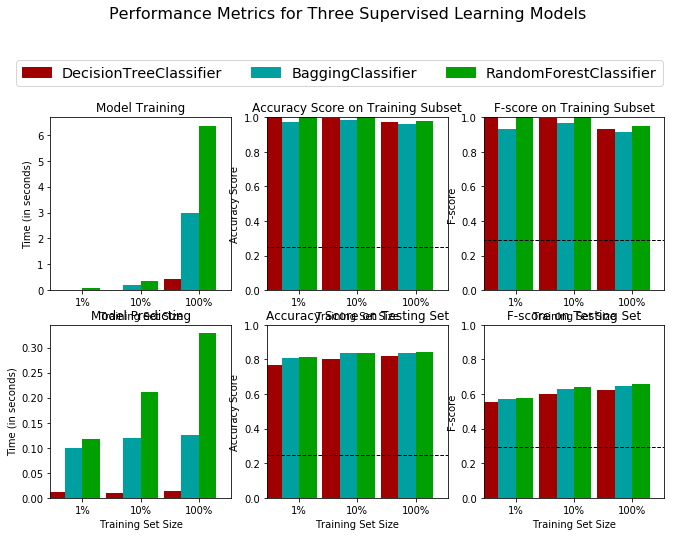

In [28]:
# TODO: Import the three supervised learning models from sklearn
from tqdm import tqdm_notebook as tqdm
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

#Naive Bayes Theorem, Decision Trees and Support Vector Machines
# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state = 0)
clf_B = BaggingClassifier(random_state = 0)
clf_C = RandomForestClassifier(random_state = 0,n_estimators=100)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)


samples_100 = len(X_train)
samples_10 = round(0.1*samples_100)
samples_1 =  round(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in tqdm(enumerate([samples_1, samples_10, samples_100])):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [29]:
results

{'DecisionTreeClassifier': {0: {'train_time': 0.003991603851318359,
   'pred_time': 0.011030197143554688,
   'acc_train': 1.0,
   'acc_test': 0.76705362078496409,
   'f_train': 1.0,
   'f_test': 0.55595363540569021},
  1: {'train_time': 0.0279996395111084,
   'pred_time': 0.01003885269165039,
   'acc_train': 0.9966666666666667,
   'acc_test': 0.80409065782200106,
   'f_train': 0.99300699300699302,
   'f_test': 0.60233393177737882},
  2: {'train_time': 0.43402767181396484,
   'pred_time': 0.012972116470336914,
   'acc_train': 0.96999999999999997,
   'acc_test': 0.81824212271973462,
   'f_train': 0.93430656934306566,
   'f_test': 0.62310866574965607}},
 'BaggingClassifier': {0: {'train_time': 0.02300095558166504,
   'pred_time': 0.09999775886535645,
   'acc_train': 0.96999999999999997,
   'acc_test': 0.80917634051962406,
   'f_train': 0.93430656934306566,
   'f_test': 0.57298367144977735},
  1: {'train_time': 0.1869983673095703,
   'pred_time': 0.11900162696838379,
   'acc_train': 0.9833

As we can notice, the acc_train and f_test improved in each model. The important number here is the test one because we want to make sure it can predict to new unseen data.

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.



__Answer__ <br><br>
I am chosing the Random Forest classifier as the model which we will seek to use and improve. The reason behind this is that Random Forest model has the highest accuracy and highest F-Score for us in the Testing set. These results are shown in the bar charts above (last row, middle column and last row last column). The RandomForest test accuracy was 84.17% while the f-score was 66.05%

<br> Accuracy is important to us because we want to accurately determine whether or not an individual makes at least 50K. We do not want to miss out on prospective Donors because our model did not include a high earning individual (missing a True Positive).
<br><br> In addition, the F-score is important to us as well because that helps us determine our False Negative and False Positive. We are using an F-score formula which averages out these answers. The formula for Recall is TP / (TP + FN) which means that by having a number as close to 1 as possible, we reduce FN or False Negatives. False negatives would be when the prediction model discounts an individual client who makes at least 50K because it thought he makes less. That is important because that is a lost lead!
<br> On the other hand, the formula for Precision is TP / (TP + FP), FP is false positive. We want this answer to be as close to 1 as possible because that would mean we have a small number of False Positive. We want to avoid false positives because that would be the equivalent of our model predicting that someone makes more then 50K when in reality he doesn't. That would translate itself in wasting the Charity's time in contacting the individual. The individual could also get upset because the charity is wasting his time on the phone or by sending him a letter when they don't make that much money to be donating.
<br><br>
Finally, looking at the training and prediction time, there is not much of a difference. All 3 methods don't take much time in terms of training and prediction. Random Forests took the most time with around 7s to train the model.
<br><br> Random Forests are suitable for this problem as previously mentionned. We want to predict with as much accuracy while reducing False positive and False negatives.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

The final model works as follows:<br><br>
__1)__ It looks at past data in order to predict a future outcome, in our particular case this means looking at the various characteristics of individuals to help us determine whether or not they make at least 50K.
<br><br>__2)__ The characterstics the model looks at is everything included about the individuals. In this case, we gave the model the following information: age, workclass, education_level, number of education years, marital status, occupation, relationship, race, sex, capital-gain, capital-loss, hours per week and native country. This means that in the future, when we get new  individuals, we can collect this information and input the information in our computer. If the model outputs a 1 it means the user makes more then 50K and if it outputs a 0 it means that he does not make more then 50K.
<br><br>Our model is not perfect... In fact, the model's accuracy is 84.35% which means whatever it predicts (a 1 or 0) is correct 84.35% of the time. This translates into the following: 33% of the time (1 minus fscore) we may end up calling somebody who doesn't make 50K or we avoid calling someone who in reality makes 50K. In the former case, this is wasted time for the company and individual. This may also irritate the indivual. In the latter case, we may miss out on a potential donor since in reality he makes more then 50K but our model predicted that he doesn't which means we wouldn't call him.  
<br> __3)__ How did we come up with these numbers? It's simple, we obtained a little more then 45,000 historical records. These records include the information about the features/characteristics of the individuals and whether or not they make at least 50K. We split the historical records in something called a training sample and a testing sample. We do this to make sure we are not finding a perfect solution to 100% of our records... instead we find a solution to 80% of the data points and then use the patterns we have learned on the remaining 20% of the records to check if we did a good job. This ensures that our model is not biased towards the 100% sample, instead its biased towards the 80% sample but when we use it on the remaining 20% we make sure it does a good job in predicting who belongs in the 50K income bracket. So basically, we train our model on 80% of the data, then use the features/characteristics of the 20% set to come up with a 'over/under 50K prediction'. These predictions follow the patterns we have learned on the 80% set. Once these predictions are created we verify how well we did because the 20% set already has that information since it was collected (this would be the 'over/under 50K mark). By verifying that we did a good job on the 20% set, we can use this tool in the future on 'unseen/new data'.
<br><br> __4)__ How does the Final Random Forest model work? In this specific case we started out by building a decision tree which delineates data in the same way a regular human would. For example: Is the individual Above or Below 30 years old. For those that are below, are they doctor (yes/no). For those that are above, are they a doctor (yes/no). The computer meticulously choses the question ordering but it has its flaws. We then sought to improve upon this method using a Bagging Classifier which is basically randomly re-sampling the training data, creating multiple models and combining the results to form an Aggregated Consensus. Unfortunately the interpretability (think in and outs... why did the computer place individual A in the 'over 50K' while individual B was placed in the 'under 50K' category) of this method suffers greatly and it is hard for a human to explain the computer's decision making process. Bagging classifiers can improve the accuracy of the model because by re-sampling the data, we reduce the effect variance has (think flipping a fair coin 10 times but the coin landing heads 7 times, by repeating the experiment many many times, the average number of times the coin lands on Heads will be 5 times out of 10, bagging classifiers use a similar process to obtain 'an averaged out' prediction which eliminates the error you would get from running the experiment only once, in the coin case the error is thinking the coin is rigged because it landed on heads 7 times out of 10).
<br><br> Finaly, Random Forests use a boostraping process like Bagging Methods except they also only consider a fraction of the features/characteristics of the individuals. Once its time for a prediction, the Random Forest model takes the majority of each individually constructed decision tree (remember the decision trees are built independtly based on random sampling of the training data and then for each decision tree it builds it only considers by default the square root of the number of characteristics or features) and gives an output based on that majority. By following this procedure, we gain more accuracy and f-score points. In our case, it is appropriate to use a Random Forest because most of our features are equally important and independant from each other.

<br><br> To keep it simple, Random Forests randomly sample the training data, then randomly sample the characteristics (it takes the square root of the number of features) and repeats this process many many times building decision trees for each sample. To come out with a prediction, it picks the output consistent with the majority of the trees. It is the best model out of all 3 chosen ones.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html). THIS IS DEPRECATED USE sklearn.model_selection
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [30]:
%%time
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV

#the best model was the Random Forest Classifier

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'n_estimators': [100,200], 
              'min_samples_split' : [2,10,20], 
              'min_samples_leaf' :  [2,10,20] }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5, average = 'binary')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8377
F-score on testing data: 0.6716

Optimized Model
------
Final accuracy score on the testing data: 0.8612
Final F-score on the testing data: 0.7321
Wall time: 8min


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8377       |     0.8612      |
| F-score        |      0.6716       |   0.7321        |


The optimized model's accuracy is 0.8612 (or 86.12%) while the F-score is 0.7321. These scores are higher thent he Unoptimized Model as seen in the table above. The Accuracy improved by around 2.5% while hte F-score improved by 6% <br><br>

The naive predictor benchmarks were the following: [Accuracy score: 0.2478, F-score: 0.2917] and thus we can see that there was a tremendous improvement with the Unoptomized and Optimized model. 


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [31]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Just looking at the columns, I would assume that these features to be the most important: 'age', 'capital-gain', 'occupation',  education level, workclass. The following explanations are based on my intution:
<br><br> Age: Odds are, older adults have more work experience and life experience then younger adults so they probable have higher salaries/income then younger adults.
<br>Capital-Gain: if an individual has higher capital-gains then he would have more disposable income. Capital-gains come from investments so that is probably a really good indicator of salary level. This feature might be even more important then Age, since if you are a relatively young but you have high capital-gains then odds are you have a higher salary.
<br>Occupation: certain occupations make more then others so this feature can help us.
<br>Education level: individuals who have higher degrees probably earn more then those who don't. For example a person with a Master's/PhD will most likely earn more then somebody who only graduated High School
<br>Workclass: I feel like the workclass can also be another good indicator... wether the person is Self-employed, or works for a government or the private sector... these labels can help us determine their income levels
<br>

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

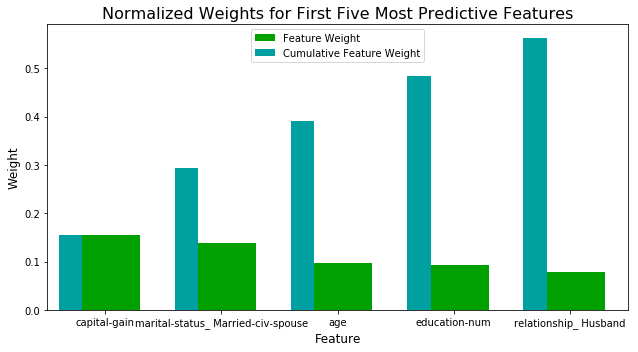

In [32]:
# TODO: I am just going to use the best model we found fromt the last section since it was optimized...

importances = best_clf.feature_importances_

indices = np.argsort(importances)

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
It looks like Capital-gain is the most important feature. I had this ranked at number 2 behind age. Age here is ranked as the third most important factor so we were pretty close. It's hard to completely discribe the relationship. I would assume Age is a good indicator until maybe the age of 60 when people tend in 1994 tend to retire so they probably start easing off their work hours/income.

<br> Besides this, I overlooked the Marriage part. I figured it wasn't that important but if I take some time and think about this ranking makes sense. If you have a higher income, you are probably more likely to get married. Also, I would also assume that high earners also marry other high earners so if you are successful enough to get Married you probably have a job that pays at least $50,000.

<br> As for education, it seems that the number of education years is more important then the education level. I was pretty close here and I also had this attribute at #4 except I aggregated this by education levels whereas it seems that the education years is a better predictor.

<br><br> Finaly, I was a bit shocked at the last  predictor, 'relationship-husband' but I guess it makes sense... we've all heard about how men make more then women and if that's not True today it was probably true in 1994 when this census was taken... Also, back then, the traditional family roles were probably more prevalent then today so odds are the Husband had to make more to take care of the family (while the wife stayed at home to raise the children).

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [33]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8612
F-score on testing data: 0.7321

Final Model trained on reduced data
------
Accuracy on testing data: 0.8436
F-score on testing data: 0.6902


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The scores actually decreased, I was a bit dissapointed by this but I assume its because by cloning the old clf we also clone the hyperparameters which were optimized for the previous features/characteristics.<br><br> If we want to reduce training/testing time and improve accuracy I would suggest making a new random forest for the reduced data and then running that random forest in a Grid/Random search function. Besides that, the random forest didnt take that much time to learn so I would consider using it again on all the data, it didn't make that much of a difference.

#### References

http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://medium.com/@harishkandan95/bagging-the-skill-of-bagging-bootstrap-aggregating-83c18dcabdf1

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

http://www.stat.cmu.edu/~ryantibs/datamining/lectures/24-bag.pdf

https://upsaily.com/blog/application-of-decision-trees-in-sales-campaign/

https://pdfs.semanticscholar.org/cdba/6a87bef89ce9650af70dc81436d9f3d28025.pdf